# LOAD AND EXPLORE DATASETS

In [8]:
import pandas as pd


broadband_data = pd.read_csv('data/broadband-penetration-by-country.csv')
mobile_data = pd.read_csv('data/mobile-cellular-subscriptions-per-100-people.csv')
internet_users_data = pd.read_csv('data/number-of-internet-users-by-country.csv')
usage_share_data = pd.read_csv('data/share-of-individuals-using-the-internet.csv')

print(broadband_data.head())
print(mobile_data.head())
print(internet_users_data.head())
print(usage_share_data.head())

print(broadband_data.info())
print(mobile_data.info())
print(internet_users_data.info())
print(usage_share_data.info())


        Entity Code  Year  Fixed broadband subscriptions (per 100 people)
0  Afghanistan  AFG  2004                                        0.000809
1  Afghanistan  AFG  2005                                        0.000858
2  Afghanistan  AFG  2006                                        0.001892
3  Afghanistan  AFG  2007                                        0.001845
4  Afghanistan  AFG  2008                                        0.001804
        Entity Code  Year  Mobile cellular subscriptions (per 100 people)
0  Afghanistan  AFG  1960                                             0.0
1  Afghanistan  AFG  1965                                             0.0
2  Afghanistan  AFG  1970                                             0.0
3  Afghanistan  AFG  1975                                             0.0
4  Afghanistan  AFG  1976                                             0.0
        Entity Code  Year  Number of internet users (OWID based on WB & UN)
0  Afghanistan  AFG  1990           

# Check for Missing Values


In [9]:
print(broadband_data.describe())
print(broadband_data.info())


              Year  Fixed broadband subscriptions (per 100 people)
count  4175.000000                                     4175.000000
mean   2010.545150                                        9.318944
std       5.280109                                       11.919007
min    1998.000000                                        0.000000
25%    2006.000000                                        0.283430
50%    2011.000000                                        3.232097
75%    2015.000000                                       15.187406
max    2019.000000                                       62.280620
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4175 entries, 0 to 4174
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Entity                                          4175 non-null   object 
 1   Code                                            3375 no

# CHECK FOR MISSING VALUES


In [10]:
print(broadband_data.isnull().sum())
print(mobile_data.isnull().sum())


Entity                                              0
Code                                              800
Year                                                0
Fixed broadband subscriptions (per 100 people)      0
dtype: int64
Entity                                               0
Code                                              2250
Year                                                 0
Mobile cellular subscriptions (per 100 people)       0
dtype: int64


# DROP ROWS WITH MISSING 'Code' VALUES


In [12]:
broadband_data = broadband_data.dropna(subset=['Code'])
mobile_data = mobile_data.dropna(subset=['Code'])


# CHECK FOR DUPLICATE VALUES IN DATASETS


In [13]:
print(broadband_data.duplicated().sum())
print(mobile_data.duplicated().sum())


0
0


# REMOVE DUPLICATE VALUES FROM DATASETS


In [14]:
broadband_data = broadband_data.drop_duplicates()
mobile_data = mobile_data.drop_duplicates()


# CONVERT YEAR COLUMN TO INTEGER TYPE


In [15]:
broadband_data['Year'] = broadband_data['Year'].astype(int)
mobile_data['Year'] = mobile_data['Year'].astype(int)


# DISPLAY COLUMNS OF DATASETS


In [17]:
print(broadband_data.columns)
print(mobile_data.columns)


Index(['Entity', 'Code', 'Year',
       'Fixed broadband subscriptions (per 100 people)'],
      dtype='object')
Index(['Entity', 'Code', 'Year',
       'Mobile cellular subscriptions (per 100 people)'],
      dtype='object')


# STRIP WHITESPACE FROM COLUMN NAMES


In [18]:
broadband_data.columns = broadband_data.columns.str.strip()
mobile_data.columns = mobile_data.columns.str.strip()


# MERGE BROADBAND AND MOBILE DATASETS


In [19]:
merged_data = broadband_data.merge(mobile_data, on=['Code', 'Year'], how='outer')


# VIEW MERGED DATA AND CHECK FOR MISSING VALUES


In [20]:
print(merged_data.head())
print(merged_data.isnull().sum())


  Entity_x Code  Year  Fixed broadband subscriptions (per 100 people)  \
0      NaN  ABW  1960                                             NaN   
1      NaN  ABW  1965                                             NaN   
2      NaN  ABW  1970                                             NaN   
3      NaN  ABW  1975                                             NaN   
4      NaN  ABW  1976                                             NaN   

  Entity_y  Mobile cellular subscriptions (per 100 people)  
0    Aruba                                             0.0  
1    Aruba                                             0.0  
2    Aruba                                             0.0  
3    Aruba                                             0.0  
4    Aruba                                             0.0  
Entity_x                                          6292
Code                                                 0
Year                                                 0
Fixed broadband subscriptions 

# DROP ROWS WITH MISSING VALUES


In [21]:
cleaned_data = merged_data.dropna()


# FILL MISSING VALUES WITH ZERO


In [22]:
merged_data.fillna(0, inplace=True)


# CHECK FOR MISSING VALUES AFTER FILLING


In [23]:
print(merged_data.isnull().sum())

Entity_x                                          0
Code                                              0
Year                                              0
Fixed broadband subscriptions (per 100 people)    0
Entity_y                                          0
Mobile cellular subscriptions (per 100 people)    0
dtype: int64


# SCATTER PLOT OF BROADBAND VS MOBILE SUBSCRIPTIONS


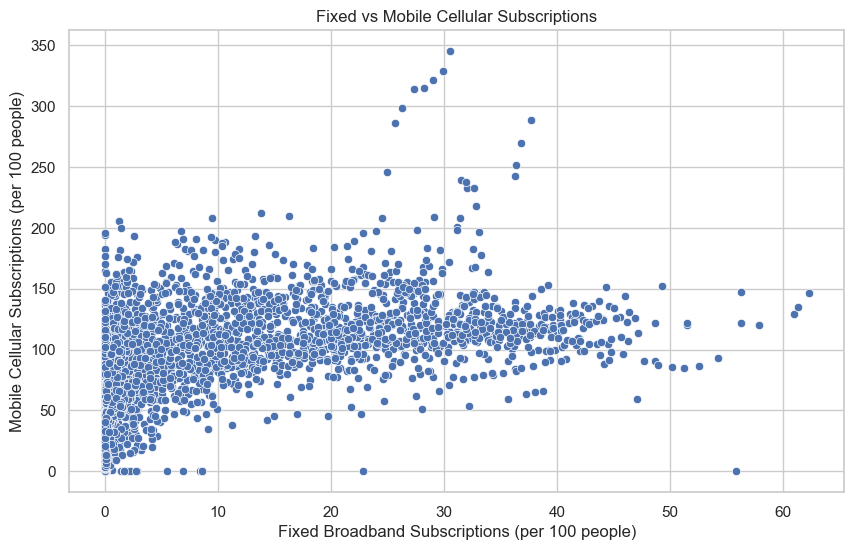

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Fixed broadband subscriptions (per 100 people)', 
                y='Mobile cellular subscriptions (per 100 people)')
plt.title('Fixed vs Mobile Cellular Subscriptions')
plt.xlabel('Fixed Broadband Subscriptions (per 100 people)')
plt.ylabel('Mobile Cellular Subscriptions (per 100 people)')
plt.show()


# DESCRIPTIVE STATISTICS OF MERGED DATA


In [25]:
print(merged_data.describe())


              Year  Fixed broadband subscriptions (per 100 people)  \
count  9667.000000                                     9667.000000   
mean   1995.056274                                        3.409294   
std      14.760553                                        8.678069   
min    1960.000000                                        0.000000   
25%    1984.000000                                        0.000000   
50%    1996.000000                                        0.000000   
75%    2008.000000                                        0.357048   
max    2019.000000                                       62.280620   

       Mobile cellular subscriptions (per 100 people)  
count                                     9667.000000  
mean                                        31.612650  
std                                         48.743883  
min                                          0.000000  
25%                                          0.000000  
50%                              

# HISTOGRAMS OF MERGED DATA DISTRIBUTIONS


<Figure size 1200x600 with 0 Axes>

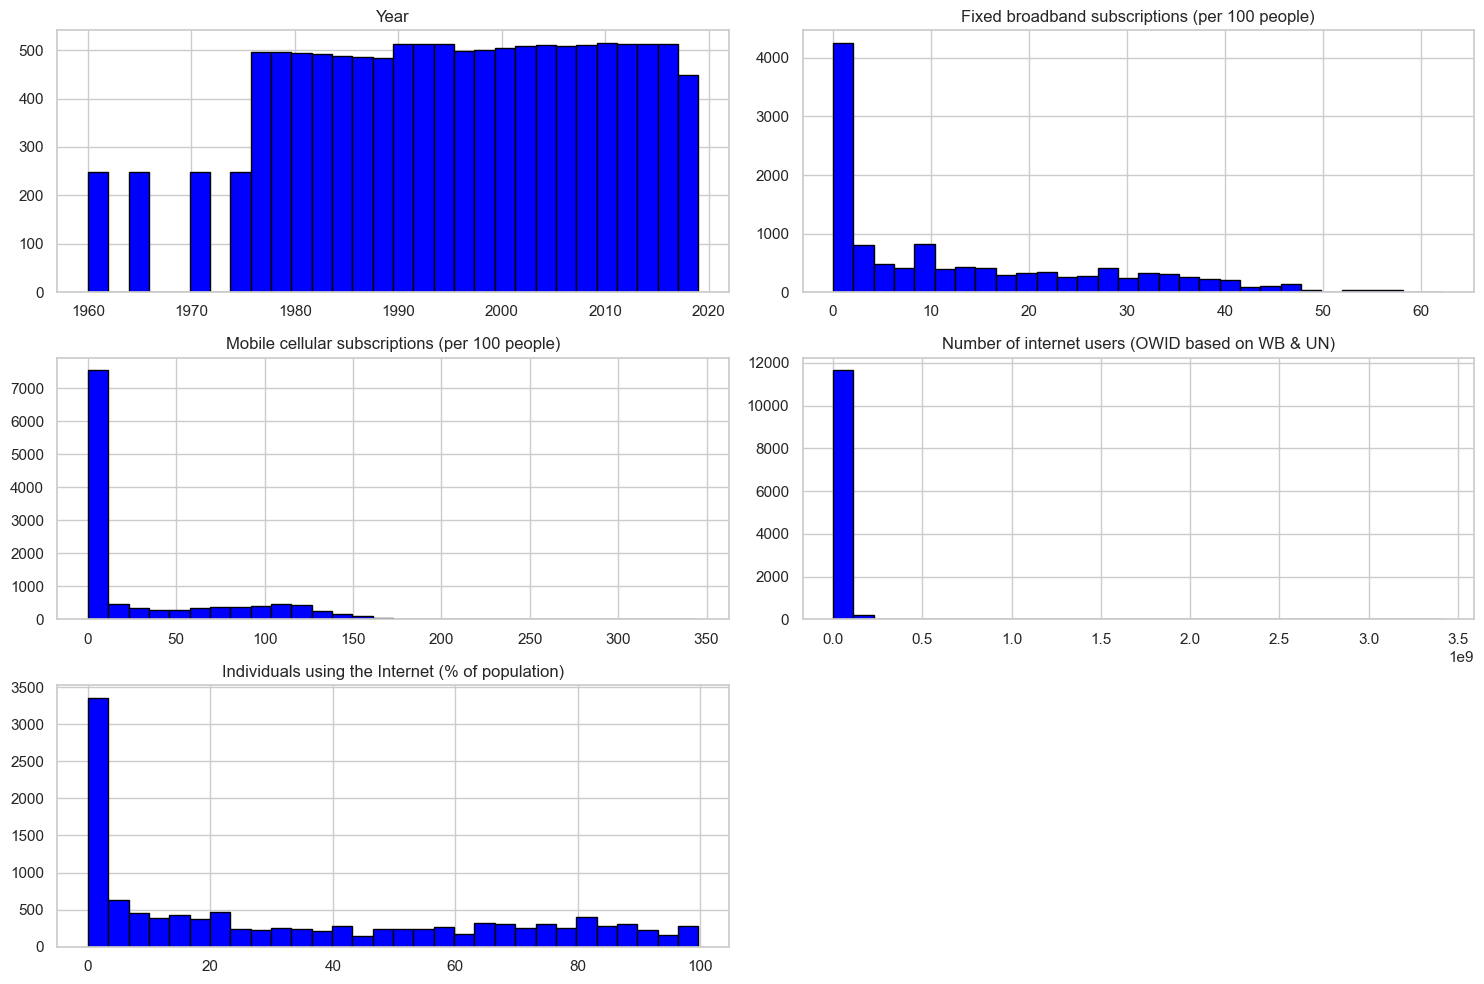

In [105]:
plt.figure(figsize=(12, 6))
merged_data.hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

# Observations:
# 1. The distribution of Fixed Broadband Subscriptions is heavily left-skewed, with many countries reporting low to zero subscriptions.
# 2. The distribution of Mobile Cellular Subscriptions shows a wider spread, indicating varying levels of mobile penetration across countries.
# 3. The Year variable appears to have a more uniform distribution, reflecting the data collected over time from 1960 to 2019.

# CALCULATE FIXED TO MOBILE SUBSCRIPTIONS RATIO


In [26]:
merged_data['Fixed_to_Mobile_Ratio'] = merged_data['Fixed broadband subscriptions (per 100 people)'] / merged_data['Mobile cellular subscriptions (per 100 people)']


# VISUALIZE CORRELATION MATRIX


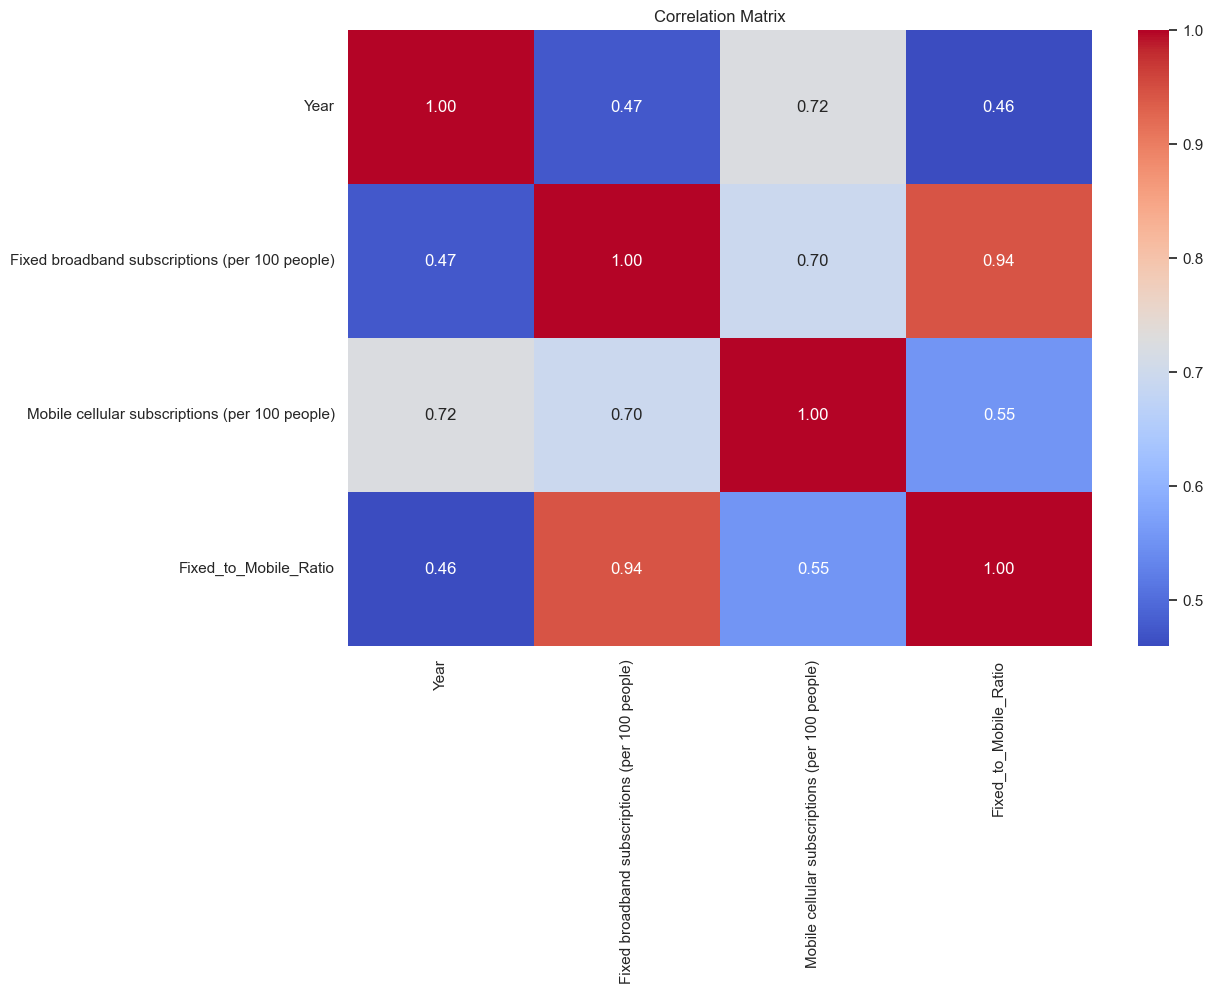

In [28]:

numeric_data = merged_data.select_dtypes(include='number')

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# LIST COLUMNS IN MERGED DATA


In [33]:
print(merged_data.columns.tolist())


['Entity_x', 'Code', 'Year', 'Fixed broadband subscriptions (per 100 people)', 'Entity_y', 'Mobile cellular subscriptions (per 100 people)', 'Fixed_to_Mobile_Ratio']


# DISPLAY LIST OF COLUMNS IN MERGED DATA


In [34]:
print(merged_data.columns.tolist())


['Entity_x', 'Code', 'Year', 'Fixed broadband subscriptions (per 100 people)', 'Entity_y', 'Mobile cellular subscriptions (per 100 people)', 'Fixed_to_Mobile_Ratio']


# CLEAN COLUMN NAMES IN MERGED DATA


In [35]:
print(merged_data.columns.tolist())


# LOAD DATA INTO DATAFRAMES AND VERIFY COLUMNS


In [38]:
import pandas as pd

fixed_broadband_data = pd.read_csv('data/broadband-penetration-by-country.csv')
mobile_cellular_data = pd.read_csv('data/mobile-cellular-subscriptions-per-100-people.csv')
internet_users_data = pd.read_csv('data/number-of-internet-users-by-country.csv')
individuals_using_internet_data = pd.read_csv('data/share-of-individuals-using-the-internet.csv')

print(fixed_broadband_data.columns.tolist())
print(mobile_cellular_data.columns.tolist())
print(internet_users_data.columns.tolist())
print(individuals_using_internet_data.columns.tolist())


['Entity', 'Code', 'Year', 'Fixed broadband subscriptions (per 100 people)']
['Entity', 'Code', 'Year', 'Mobile cellular subscriptions (per 100 people)']
['Entity', 'Code', 'Year', 'Number of internet users (OWID based on WB & UN)']
['Entity', 'Code', 'Year', 'Individuals using the Internet (% of population)']


# MERGE DATAFRAMES INTO ONE MASTER DATASET


In [39]:

merged_data = fixed_broadband_data.merge(
    mobile_cellular_data,
    on=['Entity', 'Code', 'Year'],
    how='outer'
).merge(
    internet_users_data,
    on=['Entity', 'Code', 'Year'],
    how='outer'
).merge(
    individuals_using_internet_data,
    on=['Entity', 'Code', 'Year'],
    how='outer'
)

print(merged_data.head())


        Entity Code  Year  Fixed broadband subscriptions (per 100 people)  \
0  Afghanistan  AFG  1960                                             NaN   
1  Afghanistan  AFG  1965                                             NaN   
2  Afghanistan  AFG  1970                                             NaN   
3  Afghanistan  AFG  1975                                             NaN   
4  Afghanistan  AFG  1976                                             NaN   

   Mobile cellular subscriptions (per 100 people)  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   Number of internet users (OWID based on WB & UN)  \
0                                               NaN   
1                                               NaN   
2                                               NaN  

# CHECK FOR MISSING VALUES IN THE MERGED DATASET


In [40]:

print(merged_data.isnull().sum())


Entity                                                 0
Code                                                2251
Year                                                   0
Fixed broadband subscriptions (per 100 people)      7832
Mobile cellular subscriptions (per 100 people)       112
Number of internet users (OWID based on WB & UN)    7471
Individuals using the Internet (% of population)    4888
dtype: int64


# REMOVE ROWS WITH MISSING VALUES FROM THE MERGED DATASET


In [41]:
merged_data_cleaned = merged_data.dropna()


# FILL MISSING VALUES USING FORWARD FILL METHOD


In [44]:
merged_data.ffill(inplace=True)  

# DEFINE FEATURES AND TARGET VARIABLE


In [45]:

target_variable = 'Individuals using the Internet (% of population)'

X = merged_data.drop(columns=[target_variable])  
y = merged_data[target_variable]  

print(X.shape, y.shape)


(12007, 6) (12007,)


# SPLIT DATA INTO TRAINING, VALIDATION, AND TEST SETS


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (8404, 6) (8404,)
Validation set shape: (1801, 6) (1801,)
Test set shape: (1802, 6) (1802,)


# PLOT SCATTER PLOTS FOR FEATURES AGAINST TARGET VARIABLE


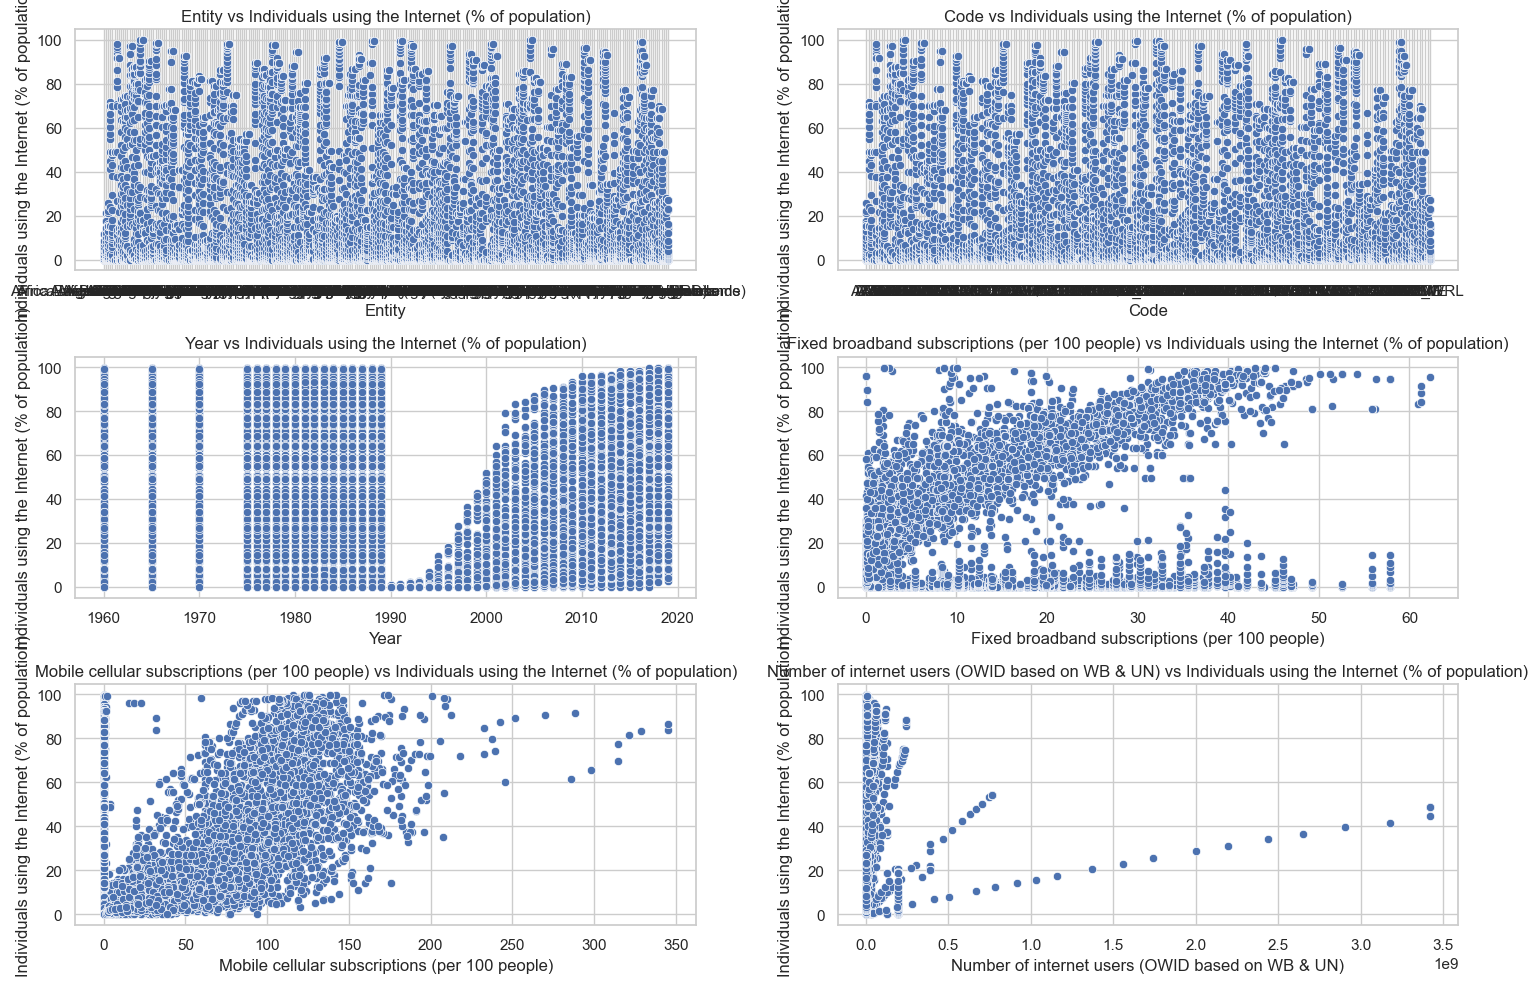

In [85]:

features = X.columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)  
    sns.scatterplot(data=merged_data, x=feature, y=target_variable)
    plt.title(f'{feature} vs {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)

plt.tight_layout()
plt.show()


# TRAIN LINEAR REGRESSION MODEL AND PLOT RESIDUALS


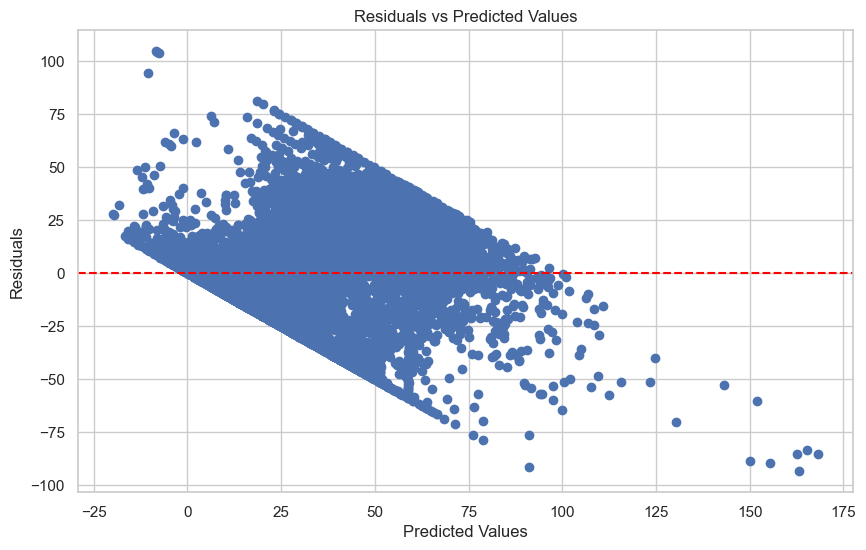

In [134]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_train)


residuals = y_train - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


# PLOT HISTOGRAM OF RESIDUALS


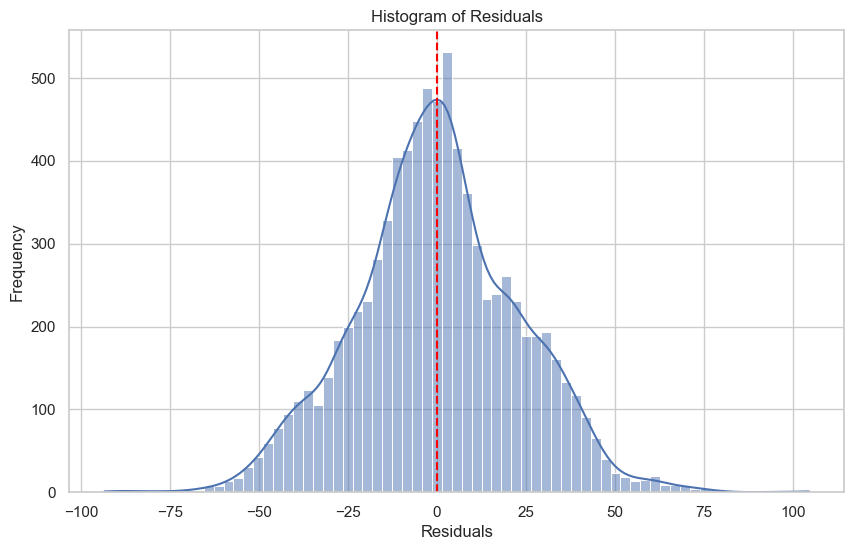

In [108]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()


# PLOT Q-Q PLOT OF RESIDUALS


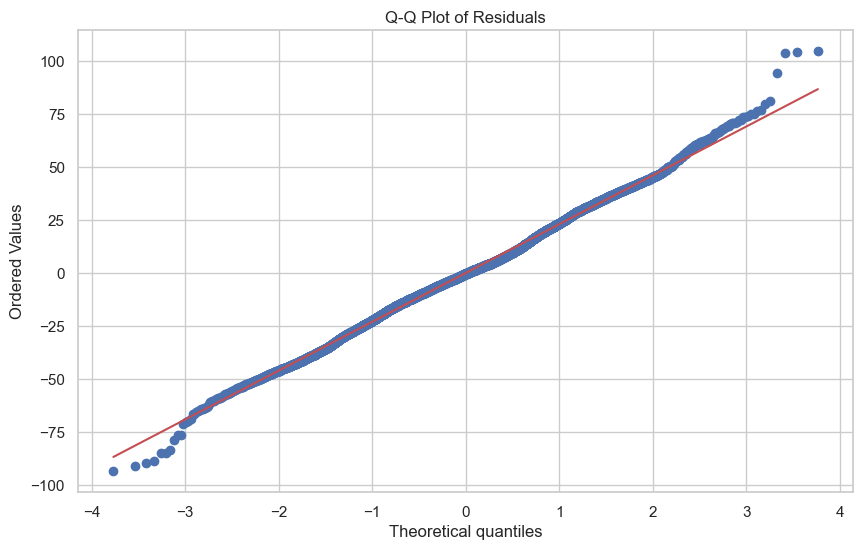

In [109]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


# Check for Homoscedasticity

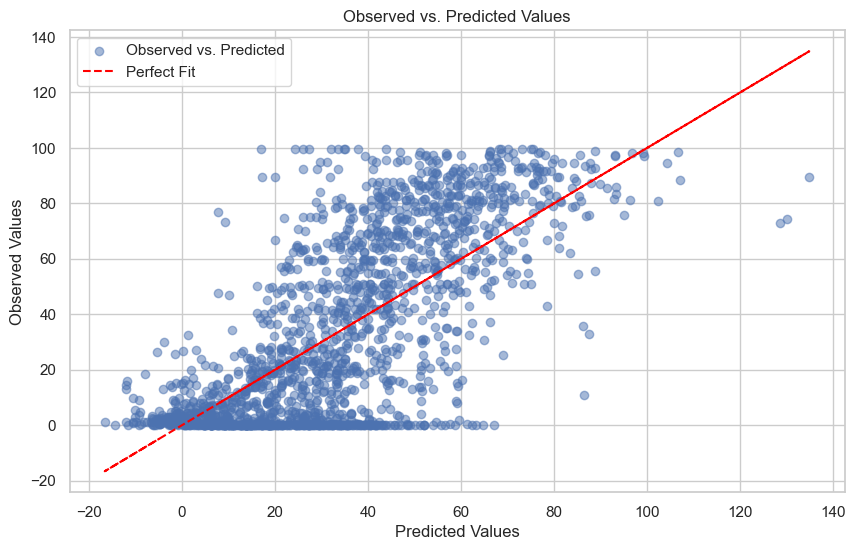

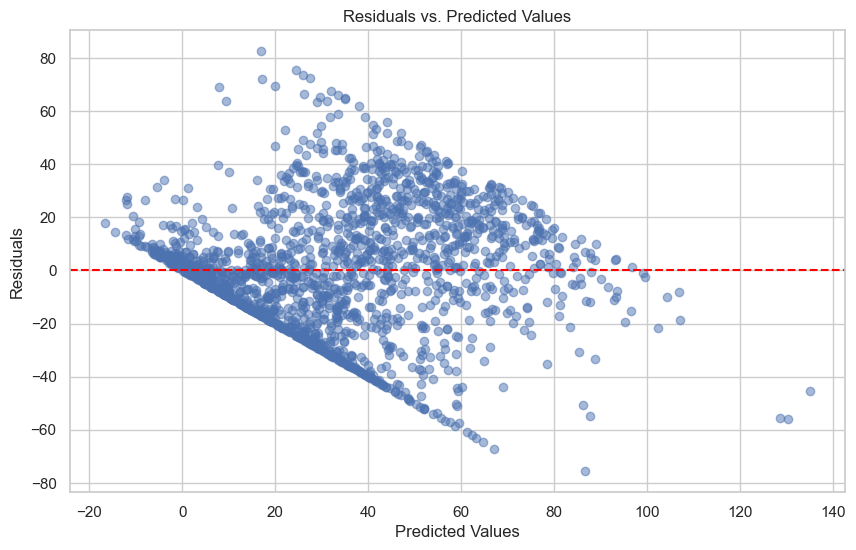

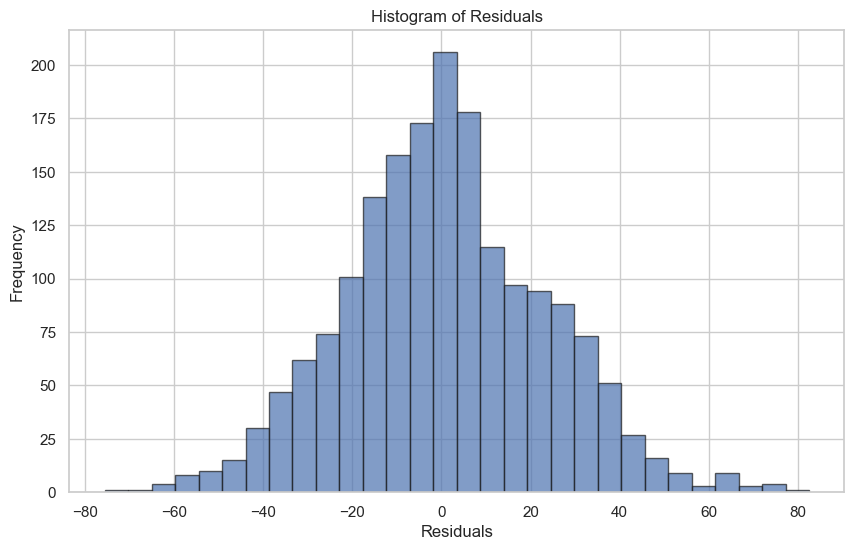

In [142]:
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_val)


residuals = y_val - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_val, alpha=0.5, label='Observed vs. Predicted')
plt.plot(y_pred, y_pred, color='red', linestyle='--', label='Perfect Fit')
plt.title('Observed vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


# IMPORT LINEAR REGRESSION AND METRICS


In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# FIT LINEAR REGRESSION MODEL AND PRINT COEFFICIENTS


In [111]:

model = LinearRegression()

model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-1.50656500e+00  9.14636012e-01  5.10729237e-01  4.21156987e-09]
Intercept: 3011.720509990479


# TRAIN LINEAR REGRESSION MODEL


In [87]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [-1.50656500e+00  9.14636012e-01  5.10729237e-01  4.21156987e-09]
Intercept: 3011.720509990479


# Tuning Alpha Parameter for Ridge Regression

In [135]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alphas = [0.01, 0.1, 1, 10, 100]
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid={'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)


y_val_ridge_pred = ridge_model.predict(X_val)
ridge_mse_val = mean_squared_error(y_val, y_val_ridge_pred)
ridge_r2_val = r2_score(y_val, y_val_ridge_pred)

print("Ridge Regression with Best Alpha:")
print("Validation Set MSE:", ridge_mse_val)
print("Validation Set R²:", ridge_r2_val)


Best alpha: 0.01
Ridge Regression with Best Alpha:
Validation Set MSE: 517.9145732093139
Validation Set R²: 0.5303294503718101


# EVALUATE MODEL PERFORMANCE


In [115]:
from sklearn.metrics import mean_squared_error, r2_score


y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


print("Validation Set: MSE =", mse_val, ", R² =", r2_val)
print("Test Set: MSE =", mse_test, ", R² =", r2_test)


Validation Set: MSE = 517.9145725816243 , R² = 0.5303294509410301
Test Set: MSE = 509.39788023873047 , R² = 0.5081927306595413


# EVALUATE MODEL WITH MAE AND R²


In [91]:

y_pred = model.predict(X_val)


from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)


Mean Absolute Error (MAE): 17.743367504585624
R-squared (R^2): 0.5303294509410301


# COMPARE ACTUAL VS PREDICTED FOR RIDGE AND LINEAR REGRESSION


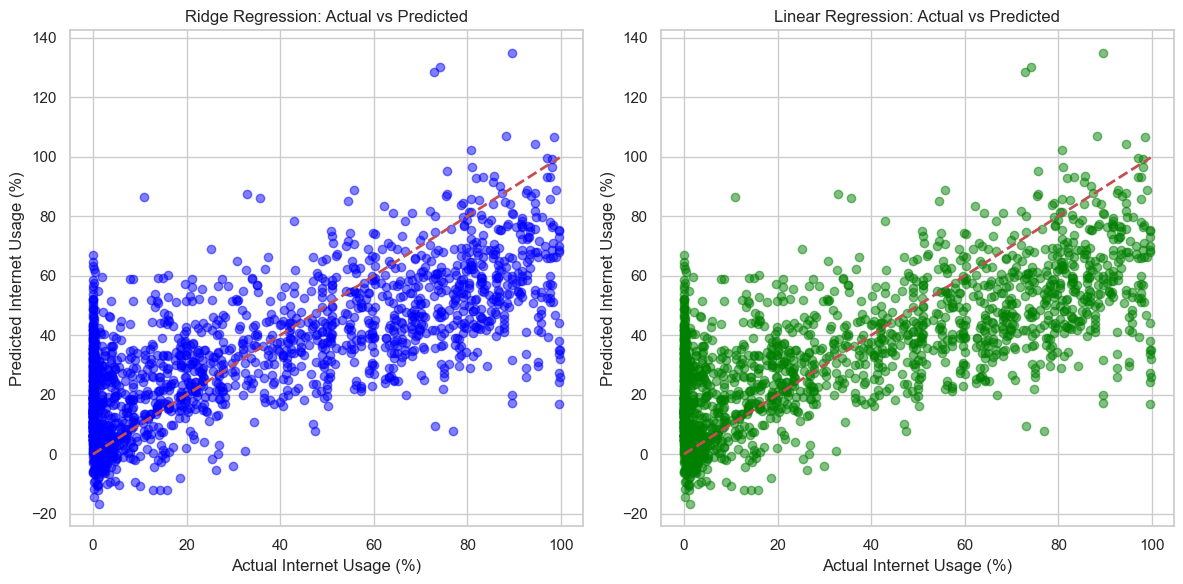

In [95]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.scatter(y_val, ridge_model.predict(X_val), color='blue', alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)  
plt.xlabel('Actual Internet Usage (%)')
plt.ylabel('Predicted Internet Usage (%)')
plt.title('Ridge Regression: Actual vs Predicted')


plt.subplot(1, 2, 2)
plt.scatter(y_val, y_pred, color='green', alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)  
plt.xlabel('Actual Internet Usage (%)')
plt.ylabel('Predicted Internet Usage (%)')
plt.title('Linear Regression: Actual vs Predicted')

plt.tight_layout()
plt.show()


# CHECK FOR NaN VALUES IN TEST SETS


In [100]:
print("NaN values in X_test:", X_test.isnull().sum().sum())
print("NaN values in y_test:", y_test.isnull().sum())


NaN values in X_test: 0
NaN values in y_test: 1


# IDENTIFY INDEXES OF NaN VALUES IN y_test


In [101]:
nan_index = y_test[y_test.isnull()].index
print("Index of NaN in y_test:", nan_index)


Index of NaN in y_test: Index([0], dtype='int64')


# DROP NaN ENTRIES FROM y_test AND X_test


In [102]:

y_test = y_test.drop(nan_index)
X_test = X_test.drop(nan_index)


# HANDLE NaN VALUES IN TEST SET AND MAKE PREDICTIONS


In [103]:

nan_index = y_test[y_test.isnull()].index
print("Index of NaN in y_test:", nan_index)

y_test = y_test.drop(nan_index)
X_test = X_test.drop(nan_index)


test_predictions = final_ridge_model.predict(X_test)

test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Test Set Mean Absolute Error (MAE):", test_mae)
print("Test Set R-squared (R²):", test_r2)


Index of NaN in y_test: Index([], dtype='int64')
Test Set Mean Absolute Error (MAE): 17.614657369641403
Test Set R-squared (R²): 0.5081918433474152


# PLOT ACTUAL VS PREDICTED FOR TEST SET


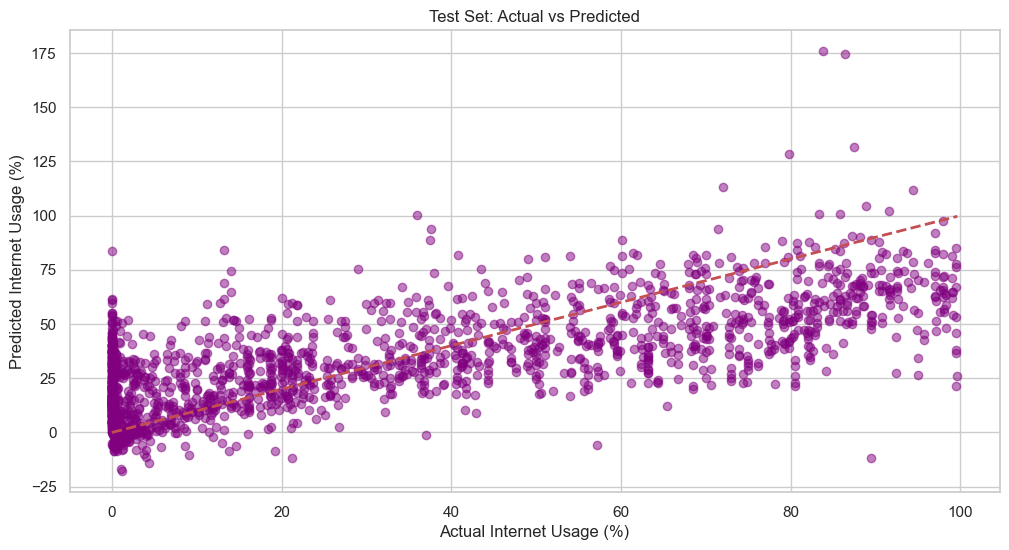

In [116]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, test_predictions, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  
plt.xlabel('Actual Internet Usage (%)')
plt.ylabel('Predicted Internet Usage (%)')
plt.title('Test Set: Actual vs Predicted')
plt.show()


# CALCULATE MEAN SQUARED ERROR FOR TEST SET


In [117]:
from sklearn.metrics import mean_squared_error

test_mse = mean_squared_error(y_test, test_predictions)
print("Test Set Mean Squared Error (MSE):", test_mse)


Test Set Mean Squared Error (MSE): 509.39879928760246


# PLOT RESIDUALS VS PREDICTED VALUES FOR TEST SET


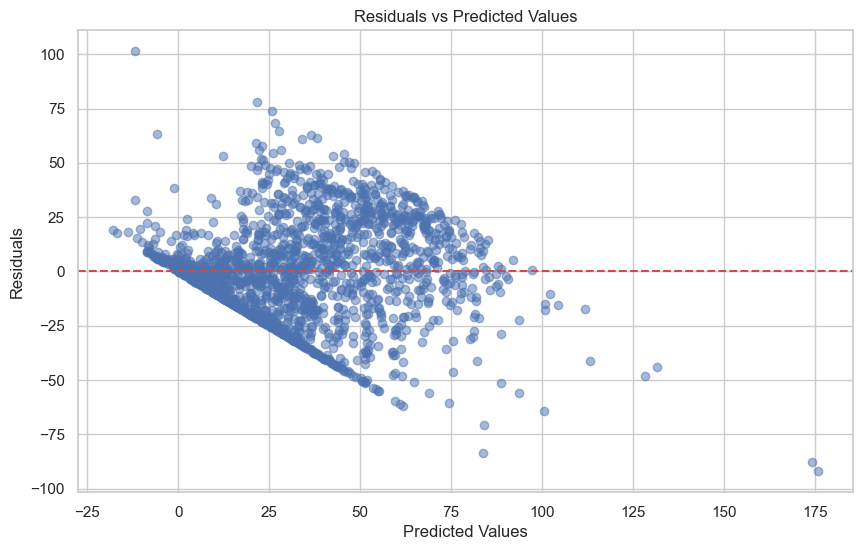

In [118]:

residuals = y_test - test_predictions


plt.figure(figsize=(10, 6))
plt.scatter(test_predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


# HISTOGRAM OF RESIDUALS


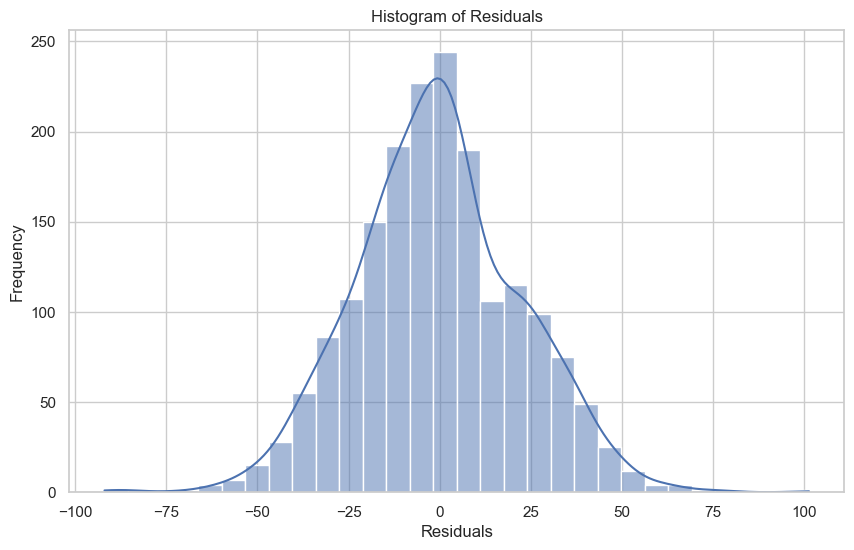

In [119]:

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


# Q-Q PLOT OF RESIDUALS


<Figure size 1000x600 with 0 Axes>

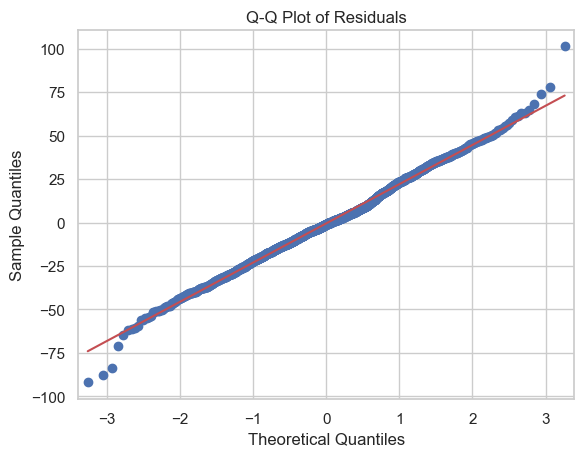

In [122]:
import statsmodels.api as sm

plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


# SHAPIRO-WILK TEST FOR NORMALITY OF RESIDUALS


In [123]:
from scipy import stats

stat, p_value = stats.shapiro(residuals)
print('Shapiro-Wilk Test statistic:', stat)
print('p-value:', p_value)


Shapiro-Wilk Test statistic: 0.9962269244812785
p-value: 0.00018872271993752285


# POLYNOMIAL REGRESSION WITH CROSS-VALIDATION


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

poly = PolynomialFeatures(degree=2)  
X_poly = poly.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

scores = cross_val_score(poly_model, X_poly, y_train, cv=5, scoring='neg_mean_squared_error')
print("Mean MSE from Cross-Validation:", -scores.mean())


Mean MSE from Cross-Validation: 493.4455536832764
